In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd, numpy as np, seaborn as sns
import joblib, os, matplotlib.pyplot as plt
from vip_helpers import *

vip_data = load_vip_data()
animals = get_animal_names()
dataclasses, state_dfs, s2p_outs, recording_days = load_animal_data('Front_left')
spikes = [s2p_out.get_cell_spikes() for s2p_out in s2p_outs]

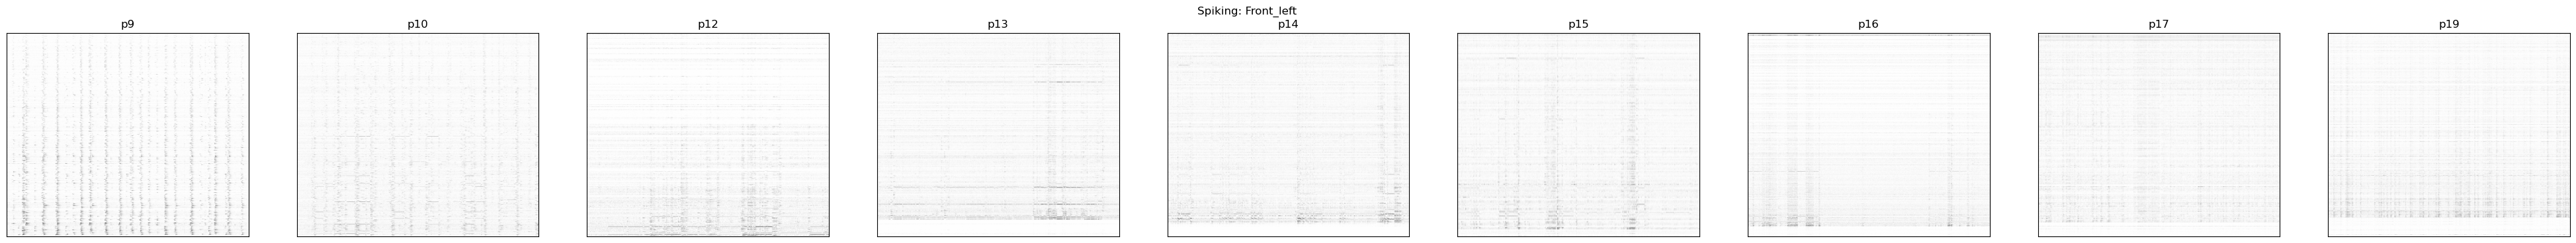

In [4]:
import matplotlib.ticker as mticker
from matplotlib.colors import Normalize

fig, axs = plt.subplots(1, len(spikes), figsize=(50,4))

plt.suptitle("Spiking: Front_left")
#plt.supylabel('Spike amplitude')
for ax_idx in range(len(spikes)):
    plot_spikes = spikes[ax_idx]
    norm = Normalize(vmin=np.percentile(plot_spikes, 1), vmax=np.percentile(plot_spikes, 99))
    axs[ax_idx].imshow(plot_spikes, aspect='auto', cmap='binary', origin='lower', norm=norm)
    axs[ax_idx].set_title(recording_days[ax_idx])

    # Remove x-axis ticks and labels
    axs[ax_idx].xaxis.set_major_locator(mticker.NullLocator())
    axs[ax_idx].xaxis.set_major_formatter(mticker.NullFormatter())

    # Remove y-axis ticks and labels
    axs[ax_idx].yaxis.set_major_locator(mticker.NullLocator())
    axs[ax_idx].yaxis.set_major_formatter(mticker.NullFormatter())
plt.show()


In [ ]:
p9_spike_df = back_left_p9.s2p_out.get_spike_df(scope_times=scope_times)
pop_averages = {cell:None for cell in range(back_left_p9.s2p_out.num_cells)}
for cell in range(back_left_p9.s2p_out.num_cells):
    p9_spike_df[ce]
    pop_averages[cell] = 

In [70]:
back_left_p9.s2p_out.get_spike_df(scope_times=scope_times)

,Cell,Time,Value
0,0,23.95370,0.000000
1,0,23.98745,11.346616
2,0,24.02135,43.694489
3,0,24.05525,0.000000
4,0,24.08915,0.000000
...,...,...,...
8990752,242,1278.25700,0.000000
8990753,242,1278.29090,0.000000
8990754,242,1278.32480,0.000000
8990755,242,1278.35870,0.000000


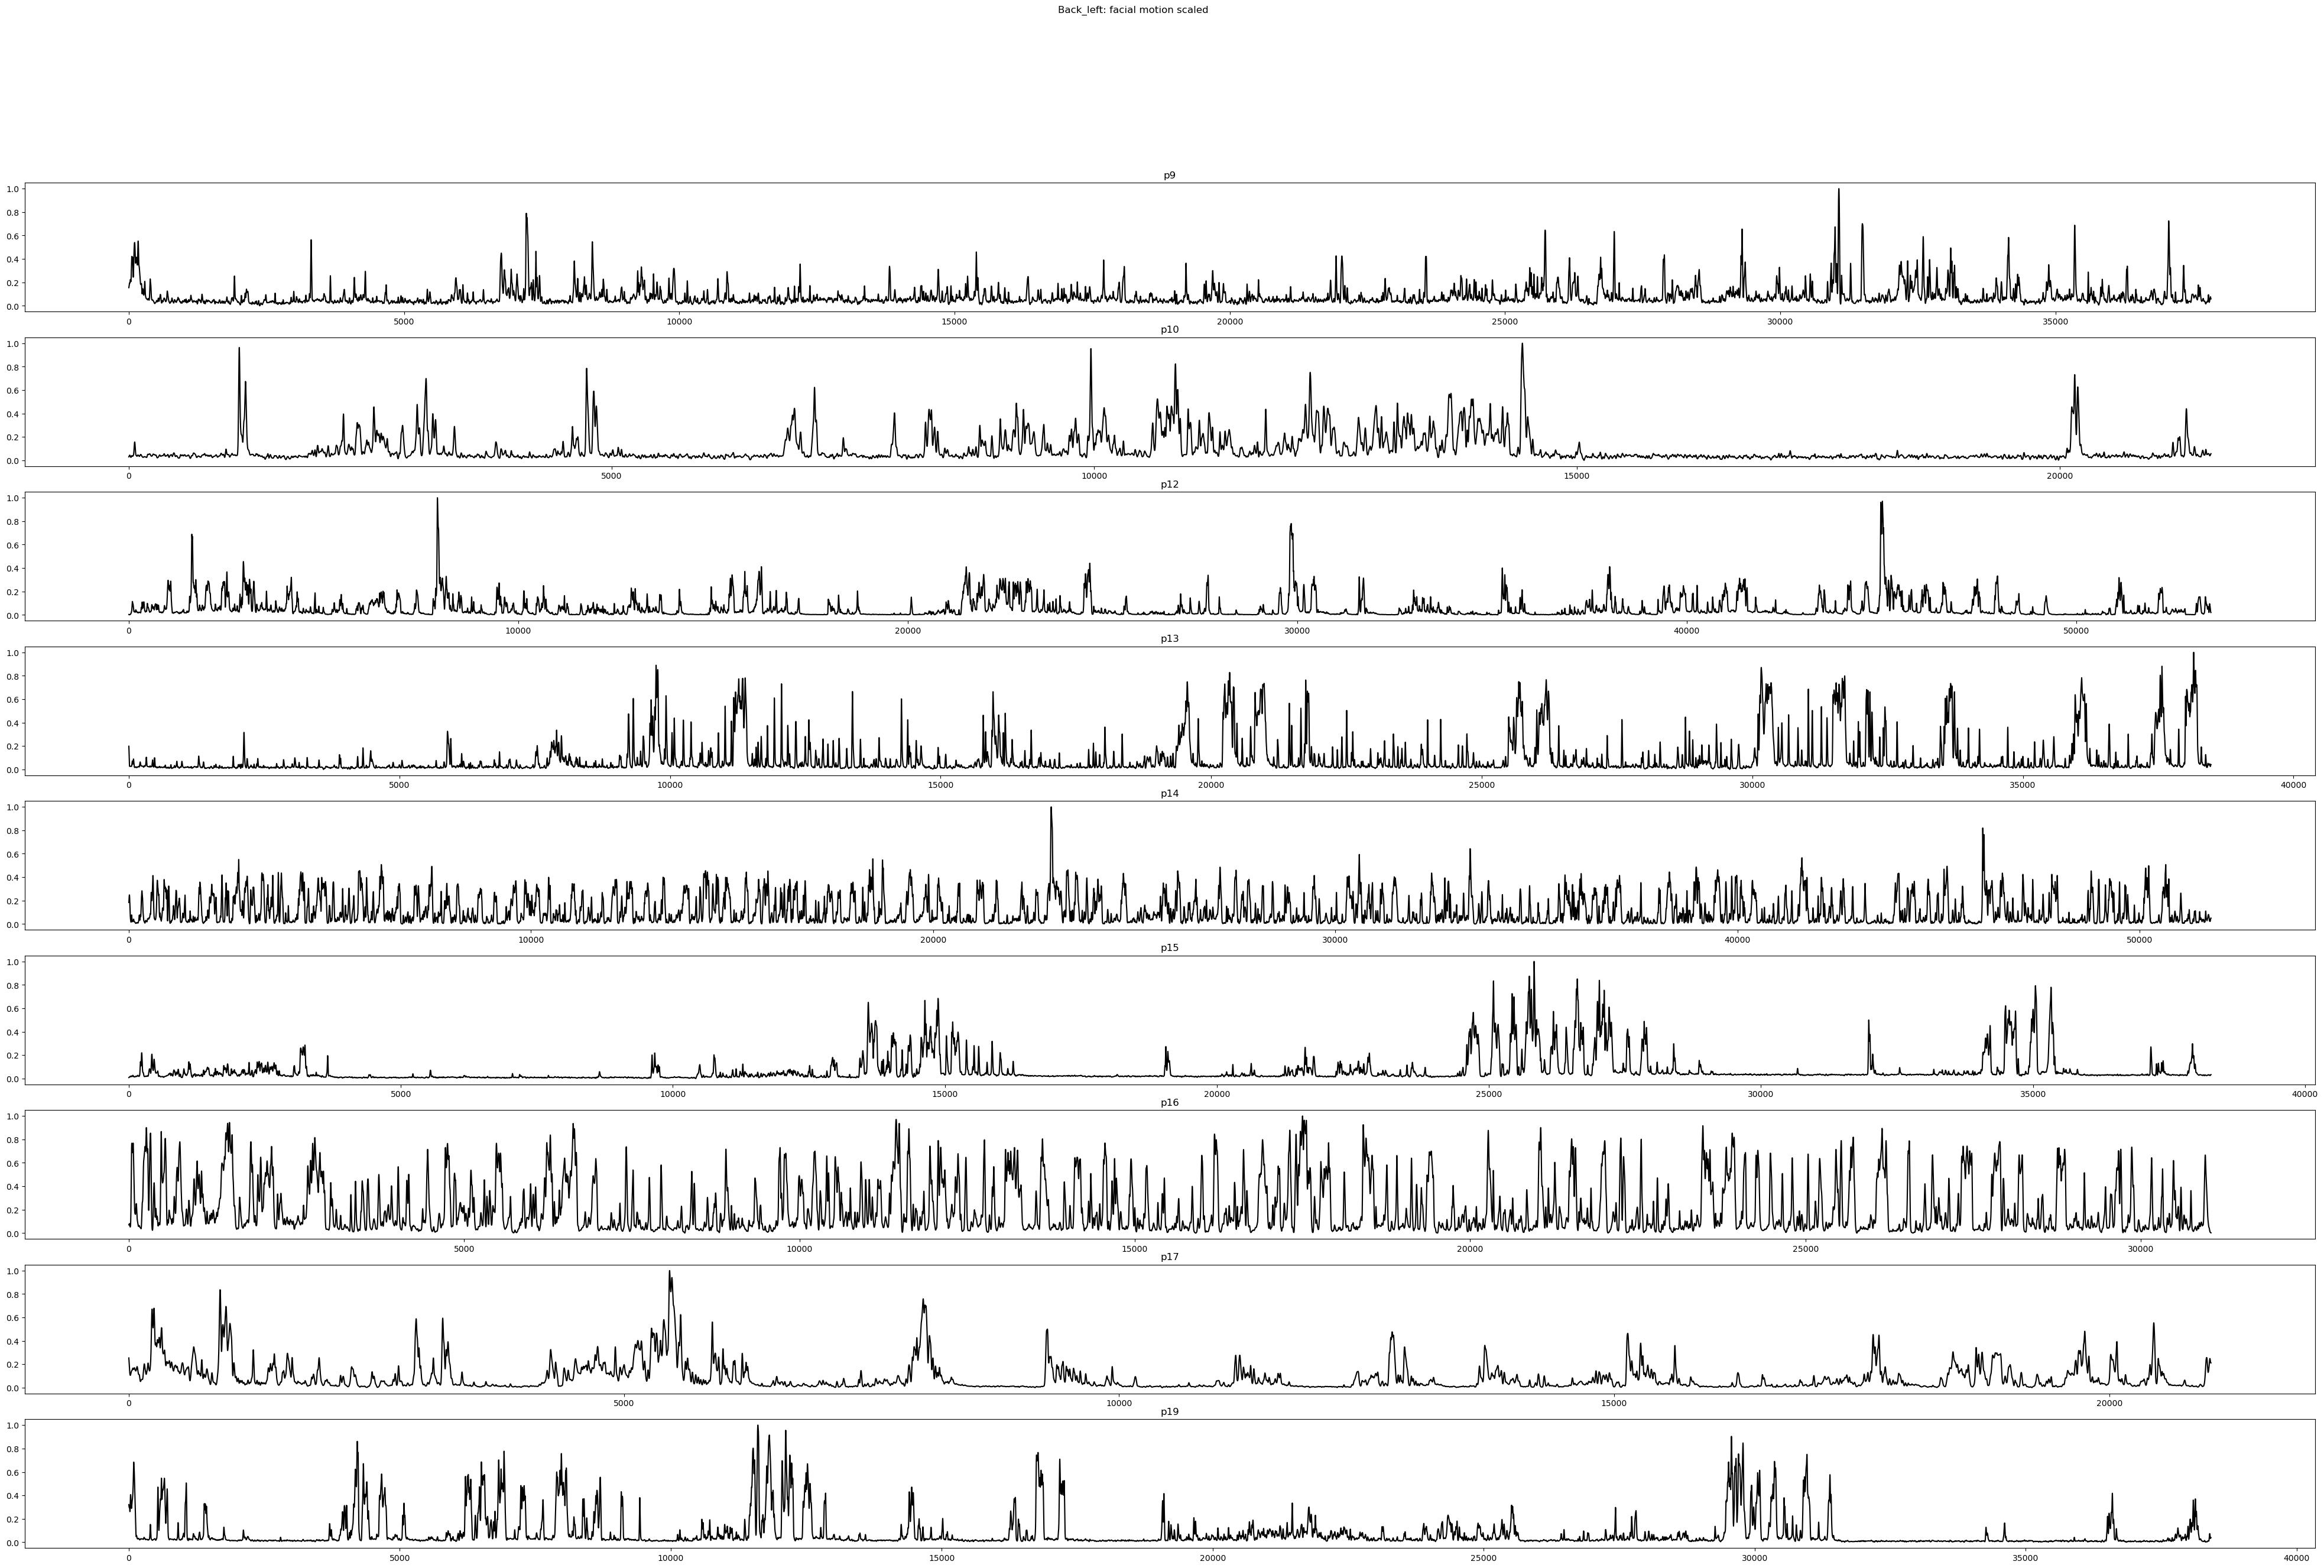

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from vip_helpers import get_day_from_path

back_left_days = [get_day_from_path(path) for path in back_left_data]
back_left_days = sorted([get_day_from_path(path) for path in back_left_data])
back_left_days = [back_left_days[-1]] + back_left_days[:-1]

fig, axs = plt.subplots(len(motion_back_left), 1, figsize=(50, 30))

for motion_arr in range(len(motion_back_left)):
    motion_to_plot = motion_back_left[motion_arr]
    axs[motion_arr].plot(np.arange(len(motion_to_plot)), motion_to_plot, color='black')
    title = back_left_days[motion_arr]
    axs[motion_arr].set_title(title)
    plt.suptitle('Back_left: facial motion scaled')

plt.show()

In [3]:
from TwoPDataPipeline import TwoPData
import os, traceback, joblib
from utils.getFPS import *
from intan.readIntan import *
import matplotlib.pyplot as plt
import pandas as pd

%load_ext autoreload
%autoreload 2
animal_path = '/mnt/Batista_Lab/Joslyn/Experiments/VIPxTiger/dob_8.3.25/preprocessed/Front_left'
recordings = [os.path.join(animal_path, f'p{day}') for day in range(9,20) if os.path.exists(os.path.join(animal_path, f'p{day}'))]
recordings = [os.path.join(rec, 'spon') if rec.endswith('p12') or rec.endswith('p16') else rec for rec in recordings]
#recordings = ['/mnt/Batista_Lab/Joslyn/Experiments/VIPxTiger/dob_8.3.25/preprocessed/Back_left/p19']
#test_path = '/mnt/Batista_Lab/Joslyn/Experiments/VIPxTiger/dob_8.3.25/preprocessed/Back_left/p15'
#recordings = ['/mnt/Batista_Lab/Joslyn/Experiments/VIPxTiger/dob_8.3.25/preprocessed/Both_front/p16/spon']
dataclasses_path = '/home/gianna/Desktop/PythonProjects/VIPxTigerAnalyses/dataclasses/Front_left'
state_dfs_path = '/home/gianna/Desktop/PythonProjects/VIPxTigerAnalyses/state_dfs/Front_left'
# for data_basepath in recordings:
#     try:
#         if not os.path.exists('data path for {data_basepath} does not exist!!'):
#             continue
#         scope_fps = get_fps_from_xml(os.path.join(data_basepath, 'Experiment.xml'))
#         all_data = TwoPData(suite2p_basepath=data_basepath, intan_basepath=data_basepath, facemap_path=data_basepath,
#                             twop_channel=4, pd_channel=None, camera_channel=3, treadmill_channel=None, scope_fps=scope_fps)
#         cam_fps = get_camera_fps(all_data.camera_times)
#     except:
#         continue
# fig, axs = plt.subplots(2, len(recordings), figsize=(60, 20))
# plot_idx = 0
#days = ['p19', 'p16/spon']
#recordings = [os.path.join(animal_path, f'{day}') for day in days]
for data_basepath in recordings:
    try:
        rec_name = os.path.basename(animal_path) + '_' + os.path.basename(data_basepath)
        #intan_data, fs_analog, convertUnitsVolt, intan_header = get_intan_data(data_basepath)
        #plot_raw_intan(intan_data, 200, 202)
        scope_fps = get_fps_from_xml(os.path.join(data_basepath, 'Experiment.xml'))
        dataclass_output = os.path.join(dataclasses_path, f'{rec_name}_dataclass.joblib')
        if not os.path.exists(dataclass_output):
            all_data = TwoPData(suite2p_basepath=data_basepath,
                                intan_basepath=data_basepath,
                                facemap_path=data_basepath, scope_fps=scope_fps,
                                twop_channel=3, pd_channel=None, camera_channel=4, treadmill_channel=None)
            joblib.dump(all_data, dataclass_output, compress=3)
        else:
            all_data = joblib.load(dataclass_output)
        s2p_out, facemap_data = all_data.s2p_out, all_data.facemap_data
        statedf_output = os.path.join(state_dfs_path, f'{rec_name}_state_df.parquet')
        if not os.path.exists(statedf_output):
            state_df = all_data.make_state_df(paw_data=False, min_max_norm=True)
        # dff = s2p_out.calc_deltaF()[0]
            state_df.to_parquet(statedf_output, engine='pyarrow')
        else:
            state_df = pd.read_parquet(statedf_output)
        # spikes = s2p_out.get_cell_spikes()
#         axs[0, plot_idx].plot(state_df['motion'])
#         axs[0, plot_idx].plot(spikes)
#         plot_idx += 1
    except:
        print(f'Failed for {data_basepath}')
        traceback.print_exc()
        continue    
# plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Found Suite2P Path /mnt/Batista_Lab/Joslyn/Experiments/VIPxTiger/dob_8.3.25/preprocessed/Front_left/p9/suite2p!

Reading Intan Technologies RHD Data File, Version 1.5

Found 3 amplifier channels.
Found 0 auxiliary input channels.
Found 0 supply voltage channels.
Found 2 board ADC channels.
Found 0 board digital input channels.
Found 0 board digital output channels.
Found 0 temperature sensors channels.

Getting transitions from 0:1233.53995 s
Found 36000 raw triggers
init scope times 36000
Aligning triggers... 36000 scope times and 35999 s2p frames
Getting transitions from 0:1233.53995 s
Found 36759 raw triggers
Found facemap file path /mnt/Batista_Lab/Joslyn/Experiments/VIPxTiger/dob_8.3.25/preprocessed/Front_left/p9/viptiger_frontleft_p9_2025-08-12-200853-0000_proc.npy
Facemap motion signal contains 36756 frames, camera captured 36759 frames.
Threshold for signal 28.646816592320565
motion_bool Tru